In [1]:
from datetime import datetime
import pandas as pd
import numpy as np

In [2]:
f = open("fvtt-log-Mon-Apr-11-2022.txt",encoding="utf8")
data = f.read()
data_list = data.split("---------------------------")
clean = []
characters = []
#df = pd.DataFrame(columns= ["Character", "Roll Result","Action","D20 Roll", "Date"])
try:
    for i, item in enumerate(data_list):
        try:
            temp_list = item.split("\n")
            temp_list = list(filter(None, temp_list))
            roll_result = temp_list[1]
            found_action = temp_list[2].find("<strong>")
            try:
                if found_action < 0:
                    found_action = temp_list[2].find('<h4 class="action">')
                    if found_action < 0:
                        found_action = -1
                    else:
                        historicType = '<h4 class="action">'
                else:
                    historicType = "<strong>"
            except:
                found_action = -1
        except:
            found_action = -1
        # try:
        #     found_action = temp_list[2].find("<strong>")
        # except:
        #     found_action = -1
        if roll_result.isnumeric() and found_action>-1:
            dateString = temp_list[0][1:temp_list[0].index(",")]
            date = datetime.strptime(dateString,'%m/%d/%Y')
            character = temp_list[0][temp_list[0].index("]")+2:]
            if character not in characters:
                characters.append(character)
            if historicType == "<strong>":
                action = temp_list[2][temp_list[2].index("<strong>")+8:temp_list[2].index("</strong>")]
            elif historicType == '<h4 class="action">':
                action = temp_list[2][temp_list[2].index('<h4 class="action">')+19:temp_list[2].index("</h4")]
            d20roll = temp_list[-1][temp_list[-1].index("=")+1:temp_list[-1].index("=")+4].strip()
            clean.append([character,roll_result,action,d20roll,date])
        data_list[i] = temp_list
    df = pd.DataFrame(clean, columns= ["Character", "Roll Result","Action","D20 Roll", "Date"])
except Exception as e:
    print(dateString)
    print(date)
    print(data_list[i])
    print("error in line " + str(i))
    print(e)


In [10]:
df
dfStrike = df

,Character,Roll Result,Action,D20 Roll,Date
0,Nemmia Bramblecloak,16,Strike: sickle,7,2021-07-06
1,Npc Actor,17,Saving Throw: Reflex,17,2021-07-06
2,Npc Actor,10,Saving Throw: Reflex,10,2021-07-06
3,Abberton Ruffians,13,Saving Throw: Reflex,8,2021-07-06
4,Nemmia Bramblecloak,14,Strike: sickle,5,2021-07-06
...,...,...,...,...,...
5888,Lucius,29,Arcane Spell Attack,12,2022-04-11
5889,Lucius,21,Strike: Scimitar,12,2022-04-11
5890,Thuja,23,Strike: Frost Longsword,5,2022-04-11
5891,Thuja,27,Strike: Frost Longsword,14,2022-04-11


In [4]:
#df.to_csv('df.csv')

In [5]:
#data_list

In [6]:
import matplotlib.pyplot as plt
import statistics

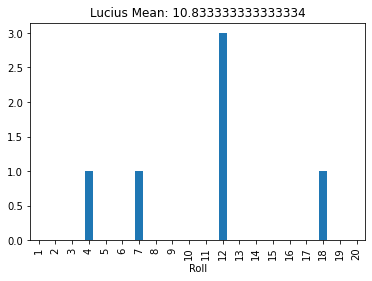

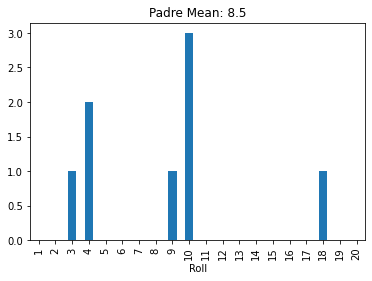

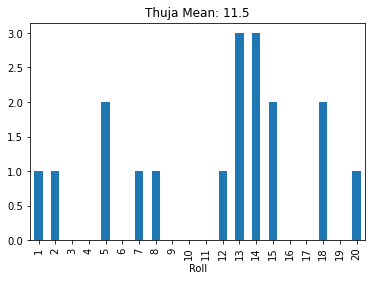

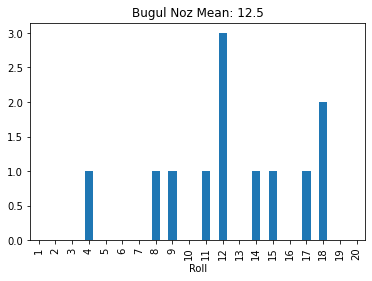

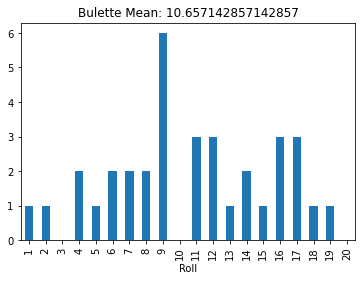

In [18]:
players = ["Lucius","Trujh Spellshot","Mr. Biscuit Oliva","Razonixx","Ylem"]
summary = []
sinceWhen = datetime(2022,4,10)
x_dice = []
searchString = "Strike"
for player in characters:
    historic = []
    x_dice = []
    rolls = pd.DataFrame(data ={"Rolls":[0]*20})
    rolls.index = rolls.index+1
    #xi = list(range(len(rolls.index)))
    newdf = df[df["Character"] == player]
    newdf = newdf[newdf["Date"] > sinceWhen]
    newdf["D20 Roll"] = pd.to_numeric(newdf["D20 Roll"])

    #newdf = newdf[newdf["Action"].char.find("Strike") > 0]
    newdf = newdf.loc[newdf['Action'].str.contains(searchString, regex=False)]
    if len(newdf.index) > 0:
        plt.figure()
        counts = newdf['D20 Roll'].value_counts()
        counts = newdf['D20 Roll'].value_counts()
        counts = counts.to_frame()
        counts.index = pd.to_numeric(counts.index)
        counts = counts.sort_index()
        newRolls = pd.concat([rolls, counts],axis=1)
        newRolls = newRolls.fillna(value={"D20 Roll":0})
        newRolls['D20 Roll'].plot.bar()
        plt.xlabel('Roll')
        plt.title(player + " Mean: " + str(newdf['D20 Roll'].mean()))
        plt.savefig(player + ".jpg", dpi=72)
        summary.append([newdf['D20 Roll'].mean(),player,len(newdf.index)])   

        
summary.sort()

In [8]:
todaydf = df[df["Date"] > sinceWhen]
todaydf
#todaydf.to_csv('today.csv')

,Character,Roll Result,Action,D20 Roll,Date
5726,Padre,29,Strike: Flaming Silver Warhammer,10,2022-04-11
5727,Thessekka,38,Will Saving Throw,14,2022-04-11
5728,Padre,41,Skill Check: Deception,20,2022-04-11
5729,Padre,22,Skill Check: Performance,2,2022-04-11
5730,Thuja,36,Strike: Frost Longsword,18,2022-04-11
...,...,...,...,...,...
5888,Lucius,29,Arcane Spell Attack,12,2022-04-11
5889,Lucius,21,Strike: Scimitar,12,2022-04-11
5890,Thuja,23,Strike: Frost Longsword,5,2022-04-11
5891,Thuja,27,Strike: Frost Longsword,14,2022-04-11


In [9]:
summary.reverse()
summary

[[18.0, 'Shoony Tiller', 1],
 [14.0, 'Thessekka', 1],
 [12.428571428571429, 'Ko', 21],
 [11.555555555555555, 'Bugul Noz', 18],
 [11.296296296296296, 'Thuja', 27],
 [11.0, 'Bulette', 55],
 [10.571428571428571, 'Lucius', 21],
 [10.173913043478262, 'Padre', 23]]